Die Daten werden mithilfe von NLTK vorverarbeitet. Der Text wird umgeandelt, dass dieser klein geschrieben wird. Die Punktuation wird entfernt. Die Stopwords werden entfernt. Der Text wird tokenisiert. Alle Stopwörter werden entfernt und die Watermarks der Webseiten werden entfernt. Zusätzlich werden die Wörter lemmatisiert.

Es werden neue CSV Dateien für jedes Jahr mit den verarbeitetem Text erstellt.

In [6]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


folder_path = '../'

for year in range(2015, 2023):

    file_path = os.path.join(folder_path, str(year), f'{year}.csv')
    df = pd.read_csv(file_path)

    df['ocr_text'] = df['ocr_text'].apply(lambda text: [
        WordNetLemmatizer().lemmatize(word)
        for word in [
            word
            for word in word_tokenize(text.translate(str.maketrans("", "", string.punctuation)).lower())
            if word not in set(stopwords.words('english')) and word != "imgflipcom"
        ]
    ])

    output_path = os.path.join(folder_path, str(year), f'{year}_processed.csv')
    df.to_csv(output_path, index=False)

    print(f'Processed {year}.csv and saved as {year}_processed.csv')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processed 2015.csv and saved as 2015_processed.csv
Processed 2016.csv and saved as 2016_processed.csv
Processed 2017.csv and saved as 2017_processed.csv
Processed 2018.csv and saved as 2018_processed.csv
Processed 2019.csv and saved as 2019_processed.csv
Processed 2020.csv and saved as 2020_processed.csv
Processed 2021.csv and saved as 2021_processed.csv
Processed 2022.csv and saved as 2022_processed.csv


**Part-of-Speech-Tagging**

Der Code führt eine Part-of-Speech-Analyse (POS) der Textdaten in einem Datensatz für jedes Jahr von 2015 bis 2022 durch und erstellt ein Balkendiagramm der 10 häufigsten POS-Tags für jedes Jahr. Zuerst wird die POS-Analyse in der Spalte 'ocr_text' des DataFrames durchgeführt, und die resultierenden POS-Tags werden in einer neuen Spalte 'pos_tags' gespeichert. Anschließend werden alle POS-Tags aus der Spalte 'pos_tags' zusammengeführt. Die Häufigkeit der POS-Tags wird mithilfe von nltk's FreqDist berechnet, und die 10 häufigsten Tags werden ermittelt. Daraufhin werden die POS-Kategorien und ihre jeweiligen Häufigkeiten aus den häufigsten Tags extrahiert

Quelle von NLTK POS-Tagging: https://www.nltk.org/api/nltk.tag.html

In [1]:
import os
import pandas as pd
import nltk
from nltk import pos_tag
import matplotlib.pyplot as plt


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

folder_path = '../'


for year in range(2015, 2023):
    file_path = os.path.join(folder_path, str(year), f'{year}_processed.csv')
    df = pd.read_csv(file_path)

    df['pos_tags'] = df['ocr_text'].apply(lambda tokens: pos_tag(eval(tokens)))
    all_pos_tags = [tag for pos_list in df['pos_tags'] for tag in pos_list]

    pos_freq = nltk.FreqDist(tag for word, tag in all_pos_tags)
    most_common_tags = pos_freq.most_common(10)
    
    pos_categories = [tag for tag, count in most_common_tags]
    pos_counts = [count for tag, count in most_common_tags]
    
    plt.figure(figsize=(10, 5))
    plt.bar(pos_categories, pos_counts)
    plt.xlabel('Part-of-Speech')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Part-of-Speech Distribution for {year}')
    
    plot_file_path = os.path.join(folder_path, str(year), f'pos_distribution_{year}.png')
    plt.savefig(plot_file_path)
    plt.close()
    print(f'Created pos_distribution_{year}.png in {year} folder')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Created pos_distribution_2015.png in 2015 folder
Created pos_distribution_2016.png in 2016 folder
Created pos_distribution_2017.png in 2017 folder
Created pos_distribution_2018.png in 2018 folder
Created pos_distribution_2019.png in 2019 folder
Created pos_distribution_2020.png in 2020 folder
Created pos_distribution_2021.png in 2021 folder
Created pos_distribution_2022.png in 2022 folder


**Named Entity Recognition**

Der Code extrahiert named entities aus der 'ocr_text'-Spalte mit Hilfe von SpaCys NER und speichert die Entitätstypen in einer neuen Spalte namens 'named_entities'. Anschließend werden alle benannten Entitätstypen aus der Spalte 'named_entities' zu einer Liste namens 'all_named_entities' zusammengefügt. Die Häufigkeit jedes benannten Entitätstyps wird mit Hilfe von nltks FreqDist berechnet, und die 10 häufigsten Entitätstypen werden ermittelt.

In [1]:
import os
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import spacy

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

nlp = spacy.load('en_core_web_sm')

for year in range(2015, 2023):
    folder_path = f"../{year}"
    processed_csv = f"{folder_path}/{year}_processed.csv"

    if os.path.exists(processed_csv):
        df = pd.read_csv(processed_csv)
        
        df['named_entities'] = df['ocr_text'].apply(lambda tokens: [ent.label_ for ent in nlp(' '.join(eval(tokens))).ents])
        all_named_entities = [entity for entity_list in df['named_entities'] for entity in entity_list]
        named_entity_freq = nltk.FreqDist(all_named_entities)

        top_named_entities = named_entity_freq.most_common(10)

        plt.figure(figsize=(10, 5))
        plt.bar([entity[0] for entity in top_named_entities], [entity[1] for entity in top_named_entities])
        plt.xlabel('Named Entity Types')
        plt.ylabel('Frequency')
        plt.title(f'Top 10 Named Entity Distribution for {year}')

        plt.savefig(f"{folder_path}/top10_named_entity_distribution_{year}.png")
        plt.close()
    else:
        print(f"{processed_csv} not found.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


**Word Frequency**

Dieser Code liest die verarbeiteten CSV-Dateien für jedes Jahr im Zeitraum von 2015 bis 2022, extrahiert die Wörter aus der Spalte 'ocr_text' und zählt die Häufigkeiten jedes Wortes mithilfe der Counter-Klasse aus dem collections-Modul. Anschließend erstellt der Code ein Balkendiagramm, um die 10 häufigsten Wörter zu visualisieren, und speichert das Diagramm als Bild.

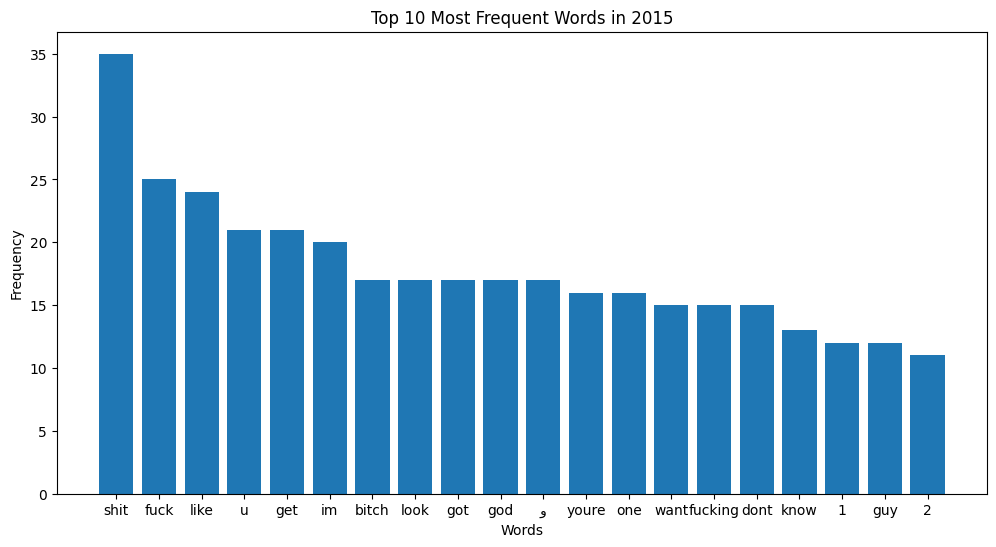

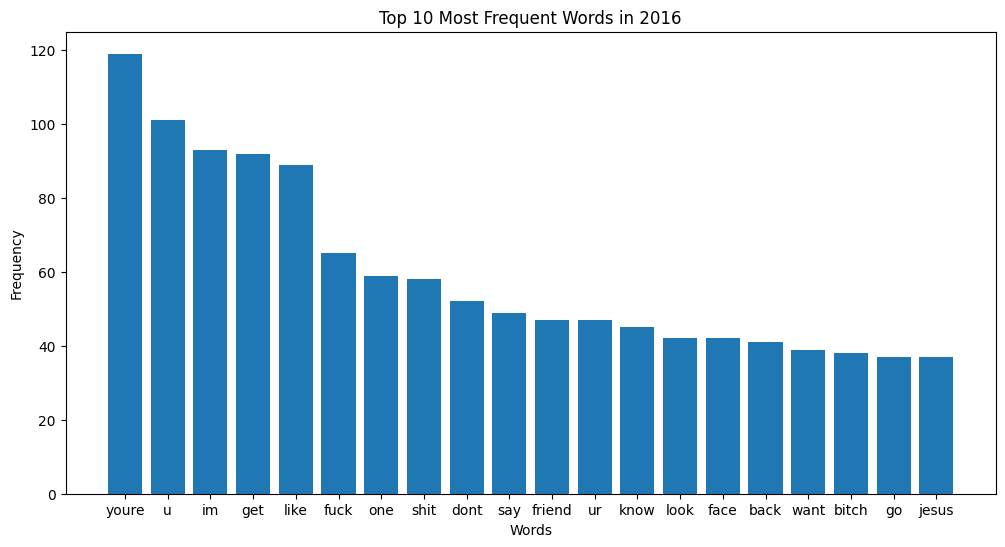

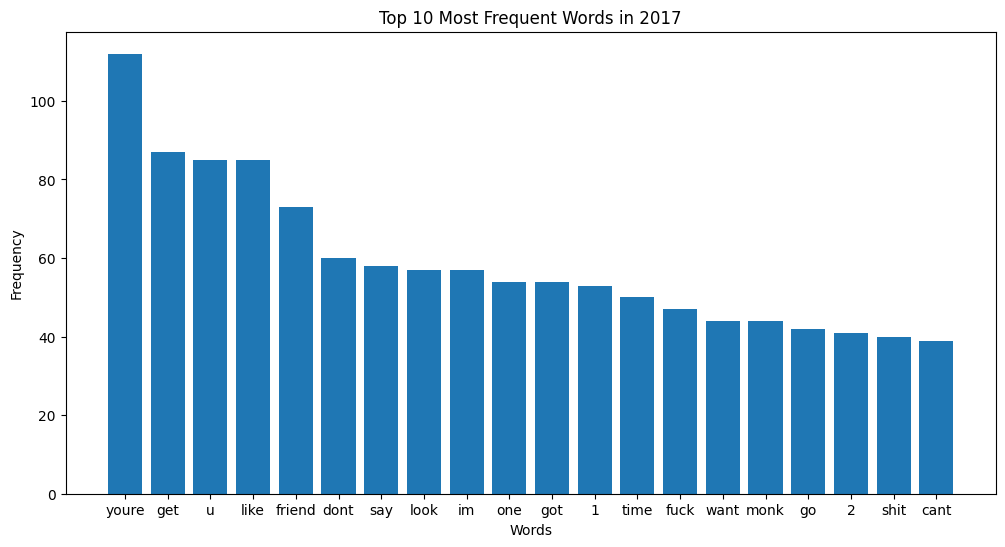

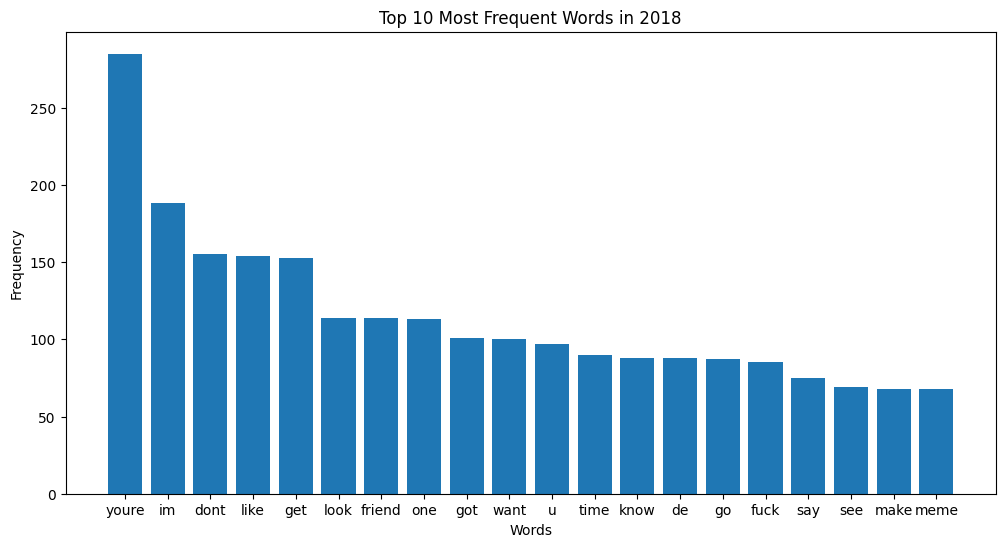

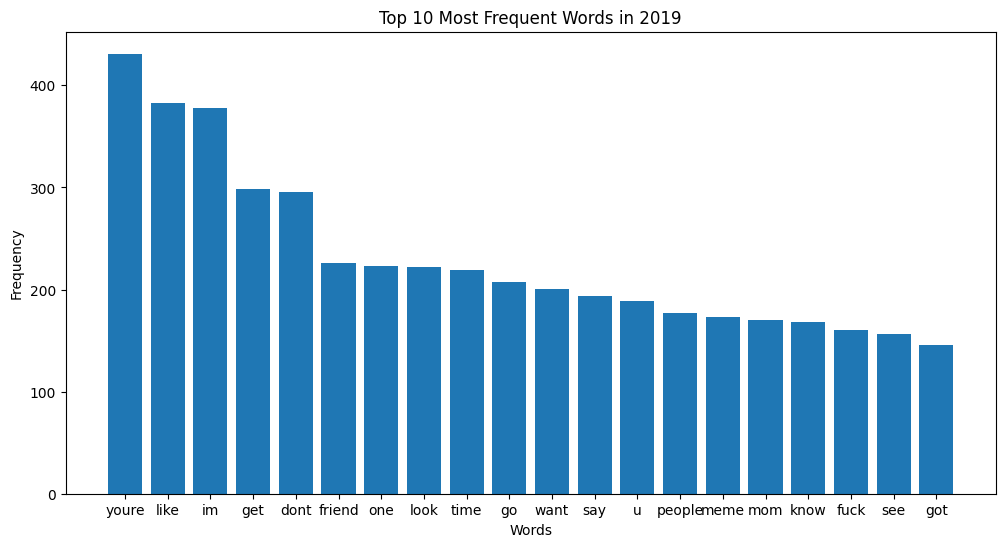

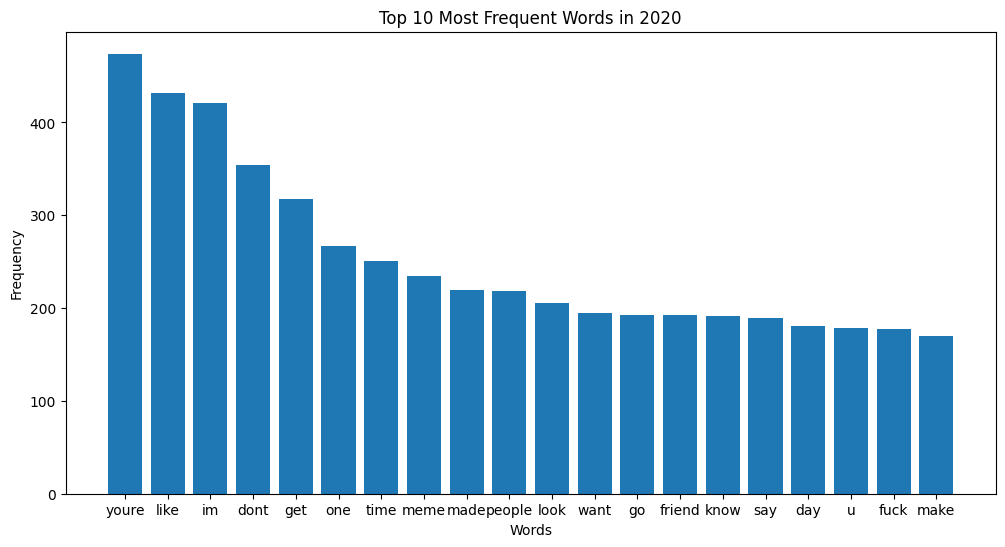

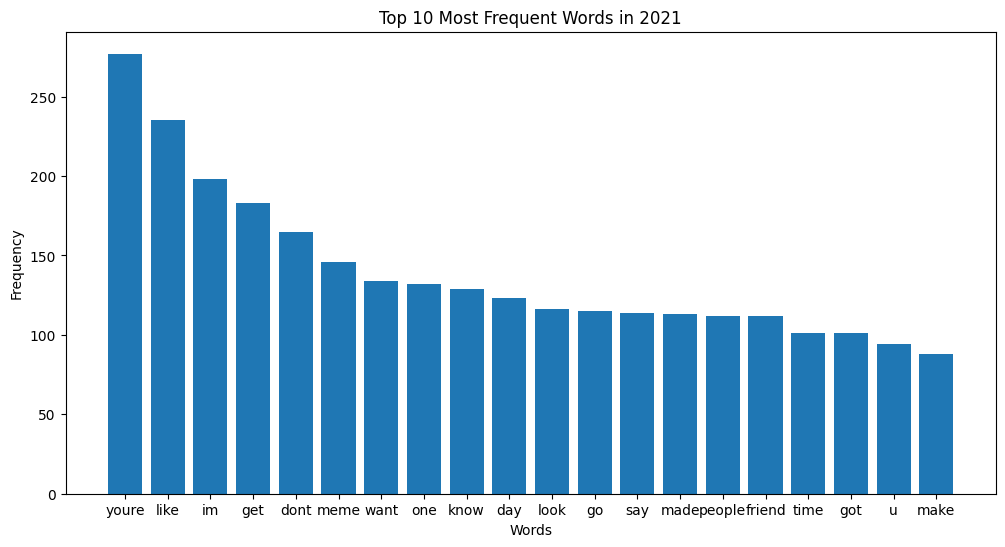

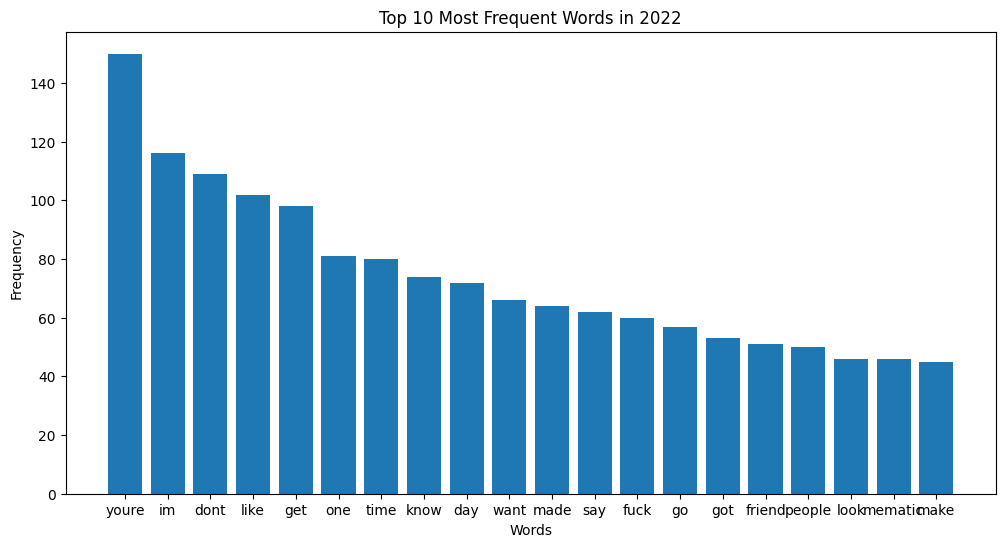

In [11]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

for year in range(2015, 2023):
    df = pd.read_csv(f"../{year}/{year}_processed.csv")
    all_words = []
    for tokens in df['ocr_text']:
        words = [word.lower() for word in eval(tokens) if word.isalnum()]
        all_words.extend(words)

    word_freq = Counter(all_words)
    
    # Plot top words
    top_words = dict(word_freq.most_common(20))
    plt.figure(figsize=(12, 6))
    plt.bar(top_words.keys(), top_words.values())
    plt.title(f"Top 10 Most Frequent Words in {year}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.savefig(f"../{year}/top_words_{year}.png")
    plt.show()



Dieser Code erstellt Wordclouds aus den verarbeiteten CSV-Dateien für jeden Jahrgang im Bereich von 2015 bis 2022 und speichert sie als Bilder.

In [13]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

folder_path = '../'

for year in range(2015, 2023):
    file_path = os.path.join(folder_path, str(year), f'{year}_processed.csv')
    df = pd.read_csv(file_path)

    tokens_list = []
    for tokens in df['ocr_text']:
        tokens_list.extend(eval(tokens))

    text = ' '.join(tokens_list)
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)

    output_path = os.path.join(folder_path, str(year), f'word_cloud_{year}_ocr_text.png')
    plt.savefig(output_path, format='png')
    plt.close()

    print(f'Word cloud for {year} saved as {output_path}')


Word cloud for 2015 saved as ../2015\word_cloud_2015_ocr_text.png
Word cloud for 2016 saved as ../2016\word_cloud_2016_ocr_text.png
Word cloud for 2017 saved as ../2017\word_cloud_2017_ocr_text.png
Word cloud for 2018 saved as ../2018\word_cloud_2018_ocr_text.png
Word cloud for 2019 saved as ../2019\word_cloud_2019_ocr_text.png
Word cloud for 2020 saved as ../2020\word_cloud_2020_ocr_text.png
Word cloud for 2021 saved as ../2021\word_cloud_2021_ocr_text.png
Word cloud for 2022 saved as ../2022\word_cloud_2022_ocr_text.png
